### Loading the super-tensor

Testing the class __super_tensor__ to load the super-tensor, and compute the cortical temporal networks.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from GDa.super_tensor import super_tensor

In [2]:
# Frequency axis used to compute coherence
freqs = np.arange(4,60,2)
# Delta used to downsample time in coherence computation
delta = 15
# Intantiating supe_tensor class
st = super_tensor(raw_path = 'GrayLab/', monkey = 'lucy', 
                  date = '150128', session = 1, delta = delta, freqs = freqs)

In [3]:
import time
start = time.time()
st.load_super_tensor()
end = time.time()
print(end - start)

1271.6779499053955


In [5]:
st._super_tensor.shape

(540, 1176, 28, 244)

In [10]:
bands = np.array([[4,8],[8,15],[15,30],[30,60]])

In [12]:
bands

array([[ 4,  8],
       [ 8, 15],
       [15, 30],
       [30, 60]])

In [13]:
idx = (freqs>=4)*(freqs<8)

In [14]:
idx

array([ True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [15]:
idx = (freqs>=8)*(freqs<15)

In [16]:
idx

array([False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [17]:
idx = (freqs>=15)*(freqs<30)

In [18]:
idx

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [19]:
idx = (freqs>=30)*(freqs<60)

In [23]:
idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [24]:
a=st._super_tensor[:,:,idx,:]

In [29]:
st_avg = np.zeros([540, 1176, 4, 244])

In [33]:
for i in range( len(bands) ):
    idx = (freqs>=bands[i][0])*(freqs<bands[i][1])
    st_avg[:,:,i,:] = st._super_tensor[:,:,idx,:].mean(axis=2)

In [81]:
b=np.swapaxes(st_avg, 0,2)
b=b.reshape([4,1176,540*244])
b.shape

(4, 1176, 131760)

Text(0.5, 0, 'Time (s)')

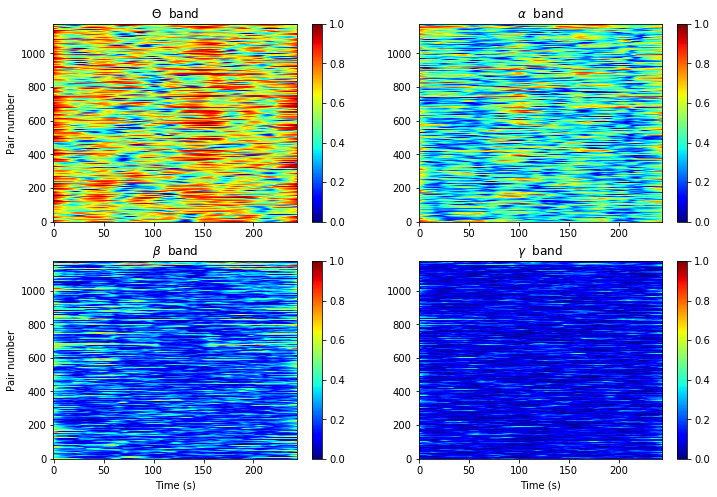

In [83]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(b[0,:,:244], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\Theta$  band')
plt.ylabel('Pair number')
plt.subplot(2,2,2)
plt.imshow(b[1,:,:244], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\alpha$  band')
plt.subplot(2,2,3)
plt.imshow(b[2,:,:244], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\beta$  band')
plt.ylabel('Pair number')
plt.xlabel('Time (s)')
plt.subplot(2,2,4)
plt.imshow(b[3,:,:244], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\gamma$  band')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

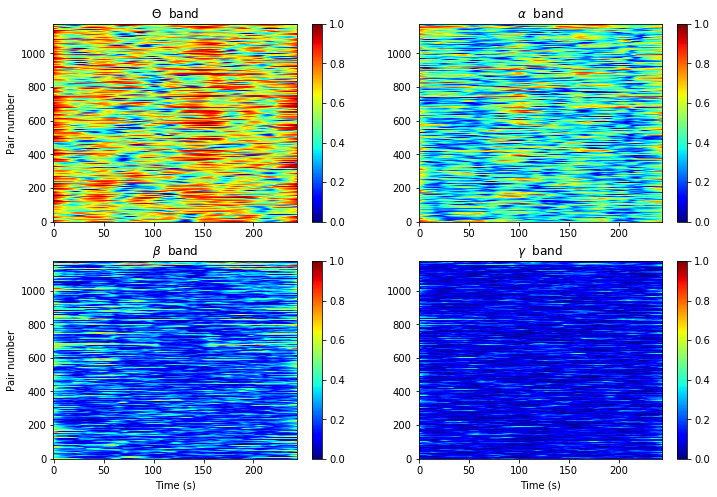

In [84]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(st_avg[0,:,0,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\Theta$  band')
plt.ylabel('Pair number')
plt.subplot(2,2,2)
plt.imshow(st_avg[0,:,1,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\alpha$  band')
plt.subplot(2,2,3)
plt.imshow(st_avg[0,:,2,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\beta$  band')
plt.ylabel('Pair number')
plt.xlabel('Time (s)')
plt.subplot(2,2,4)
plt.imshow(st_avg[0,:,3,:], aspect='auto', cmap='jet', origin='lower', vmin=0, vmax=1); plt.colorbar()
plt.title(r'$\gamma$  band')
plt.xlabel('Time (s)')

In [45]:
a = st_avg[0,:,0,:] * st_avg[0,:,1,:] * st_avg[0,:,2,:] * st_avg[0,:,3,:]

(array([  32.,   44.,  111.,  122.,  165.,  215.,  215.,  236.,  332.,
         392.,  398.,  398.,  478.,  528.,  602.,  655.,  718.,  820.,
         886.,  886.,  989., 1037., 1202., 1218., 1260., 1373., 1440.,
        1585., 1598., 1640., 1765., 1923., 2074., 2172., 2236., 2397.,
        2391., 2635., 2845., 2986., 3182., 3478., 3638., 3792., 3972.,
        4207., 4518., 4673., 4667., 4922., 5027., 5187., 5093., 5087.,
        5158., 5017., 5178., 5134., 5049., 5103., 5145., 5048., 4993.,
        4982., 5030., 5055., 5139., 5201., 5034., 4877., 4901., 4913.,
        4988., 4932., 4802., 4807., 4737., 4478., 4348., 4341., 4225.,
        4248., 4189., 4076., 3862., 3655., 3477., 3280., 3048., 2744.,
        2659., 2474., 2232., 2083., 1678., 1481., 1142.,  810.,  551.,
         198.]),
 array([0.0034752 , 0.01341677, 0.02335835, 0.03329993, 0.04324151,
        0.05318309, 0.06312466, 0.07306624, 0.08300782, 0.0929494 ,
        0.10289098, 0.11283255, 0.12277413, 0.13271571, 0.14265729

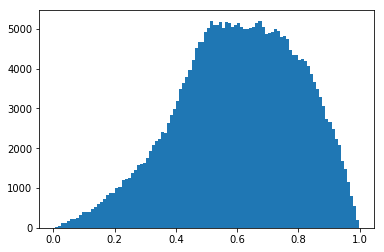

In [55]:
plt.hist(st_avg[0,:,0,:].flatten(), 100)

In [64]:
from scipy import stats
qrt  = stats.mstats.mquantiles(st_avg[0,:,3,:].flatten(), prob=85/100)

In [65]:
a=st_avg[0,:,3,:]>qrt

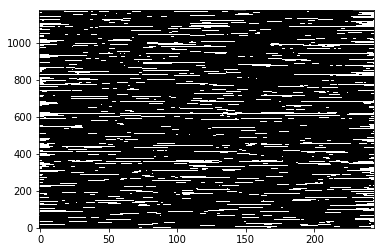

In [66]:
plt.imshow(a, aspect='auto', cmap='gray', origin='lower')

In [67]:
qrt

array([0.17424345])

In [85]:
len(bands)

4